## Random forest regressor
   combo of multiple decision tees ,output will be best one of all decision tree
   https://www.edureka.co/blog/random-forest-classifier/

In [142]:
import pandas as pd
import numpy as np

In [143]:
p=pd.read_csv("petrol_consumption.csv")
p.tail()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
43,7.0,3745,2611,0.508,591
44,6.0,5215,2302,0.672,782
45,9.0,4476,3942,0.571,510
46,7.0,4296,4083,0.623,610
47,7.0,5002,9794,0.593,524


In [144]:
x=p.drop("Petrol_Consumption",axis=1).values
x

array([[9.0000e+00, 3.5710e+03, 1.9760e+03, 5.2500e-01],
       [9.0000e+00, 4.0920e+03, 1.2500e+03, 5.7200e-01],
       [9.0000e+00, 3.8650e+03, 1.5860e+03, 5.8000e-01],
       [7.5000e+00, 4.8700e+03, 2.3510e+03, 5.2900e-01],
       [8.0000e+00, 4.3990e+03, 4.3100e+02, 5.4400e-01],
       [1.0000e+01, 5.3420e+03, 1.3330e+03, 5.7100e-01],
       [8.0000e+00, 5.3190e+03, 1.1868e+04, 4.5100e-01],
       [8.0000e+00, 5.1260e+03, 2.1380e+03, 5.5300e-01],
       [8.0000e+00, 4.4470e+03, 8.5770e+03, 5.2900e-01],
       [7.0000e+00, 4.5120e+03, 8.5070e+03, 5.5200e-01],
       [8.0000e+00, 4.3910e+03, 5.9390e+03, 5.3000e-01],
       [7.5000e+00, 5.1260e+03, 1.4186e+04, 5.2500e-01],
       [7.0000e+00, 4.8170e+03, 6.9300e+03, 5.7400e-01],
       [7.0000e+00, 4.2070e+03, 6.5800e+03, 5.4500e-01],
       [7.0000e+00, 4.3320e+03, 8.1590e+03, 6.0800e-01],
       [7.0000e+00, 4.3180e+03, 1.0340e+04, 5.8600e-01],
       [7.0000e+00, 4.2060e+03, 8.5080e+03, 5.7200e-01],
       [7.0000e+00, 3.7180e+03,

In [145]:
y=p["Petrol_Consumption"].values
y

array([541, 524, 561, 414, 410, 457, 344, 467, 464, 498, 580, 471, 525,
       508, 566, 635, 603, 714, 865, 640, 649, 540, 464, 547, 460, 566,
       577, 631, 574, 534, 571, 554, 577, 628, 487, 644, 640, 704, 648,
       968, 587, 699, 632, 591, 782, 510, 610, 524], dtype=int64)

In [146]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [147]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.3,random_state=1)

In [148]:
sc=StandardScaler()

In [149]:
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)


In [150]:
R=RandomForestRegressor(n_estimators=50,random_state=1)
R.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [151]:
y_pred=R.predict(xtest)
y_pred

array([564.56, 564.56, 856.1 , 564.56, 564.56, 564.56, 564.56, 564.56,
       856.1 , 564.56, 564.56, 564.56, 564.56, 564.56, 856.1 , 856.1 ,
       856.1 , 564.56, 564.56, 564.56, 856.1 , 564.56, 856.1 , 564.56,
       564.56, 564.56, 564.56, 564.56, 564.56, 856.1 , 564.56, 564.56,
       856.1 , 564.56])

In [152]:
R.score(xtrain,ytrain)

-2.3662007422609608

In [153]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,y_pred)

13798.593235294118

In [154]:
from sklearn import metrics
metrics.mean_absolute_error(ytest,y_pred)

86.49823529411766

In [155]:
R.predict([[6.0,5215,2302,0.672]])

array([794.34])

In [156]:
R.predict([[7.0,4296,4083,0.623]])

array([617.64])

### Random forest Classifier

In [157]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [158]:
z=pd.read_csv("zoo.csv")
z

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [175]:
x=z.iloc[:,1:17]
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0


In [160]:
y=z["class_type"]
y

0      1
1      1
2      4
3      1
4      1
5      1
6      1
7      4
8      4
9      1
10     1
11     2
12     4
13     7
14     7
15     7
16     2
17     1
18     4
19     1
20     2
21     2
22     1
23     2
24     6
25     5
26     5
27     1
28     1
29     1
      ..
71     2
72     7
73     4
74     1
75     1
76     3
77     7
78     2
79     2
80     3
81     7
82     4
83     2
84     1
85     7
86     4
87     2
88     6
89     5
90     3
91     3
92     4
93     1
94     1
95     2
96     1
97     6
98     1
99     7
100    2
Name: class_type, Length: 101, dtype: int64

In [161]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.3,random_state=1)

In [162]:
sc=StandardScaler()

In [163]:
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)


In [164]:
R=RandomForestClassifier(n_estimators=50,random_state=1)
R.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [165]:
y_pred=R.predict(xtest)
y_pred

array([1, 2, 1, 2, 1, 7, 1, 2, 4, 7, 2, 1, 1, 1, 1, 1, 1, 1, 7, 3, 2, 1,
       7, 7, 4, 7, 7, 1, 4, 1, 1, 4, 1, 1, 1, 2, 7, 1, 7, 7, 1, 2, 4, 2,
       2, 1, 7, 1, 2, 1, 4, 7, 7, 2, 2, 7, 1, 3, 7, 1, 2, 7, 1, 1, 7, 1,
       7, 4, 4, 1, 3], dtype=int64)

In [166]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [167]:
R.score(xtrain,ytrain)

0.9333333333333333

In [168]:
R.predict(xtest)

array([1, 2, 1, 2, 1, 7, 1, 2, 4, 7, 2, 1, 1, 1, 1, 1, 1, 1, 7, 3, 2, 1,
       7, 7, 4, 7, 7, 1, 4, 1, 1, 4, 1, 1, 1, 2, 7, 1, 7, 7, 1, 2, 4, 2,
       2, 1, 7, 1, 2, 1, 4, 7, 7, 2, 2, 7, 1, 3, 7, 1, 2, 7, 1, 1, 7, 1,
       7, 4, 4, 1, 3], dtype=int64)

In [169]:
cm=confusion_matrix(ytest,y_pred)
cm

array([[29,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0,  1],
       [ 0,  0,  0,  8,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  0,  7],
       [ 0,  0,  0,  0,  0,  0,  7]], dtype=int64)

In [170]:
print("accuracy",accuracy_score(ytest,y_pred))

accuracy 0.8450704225352113


In [176]:
R.predict([[0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1]])

array([4], dtype=int64)

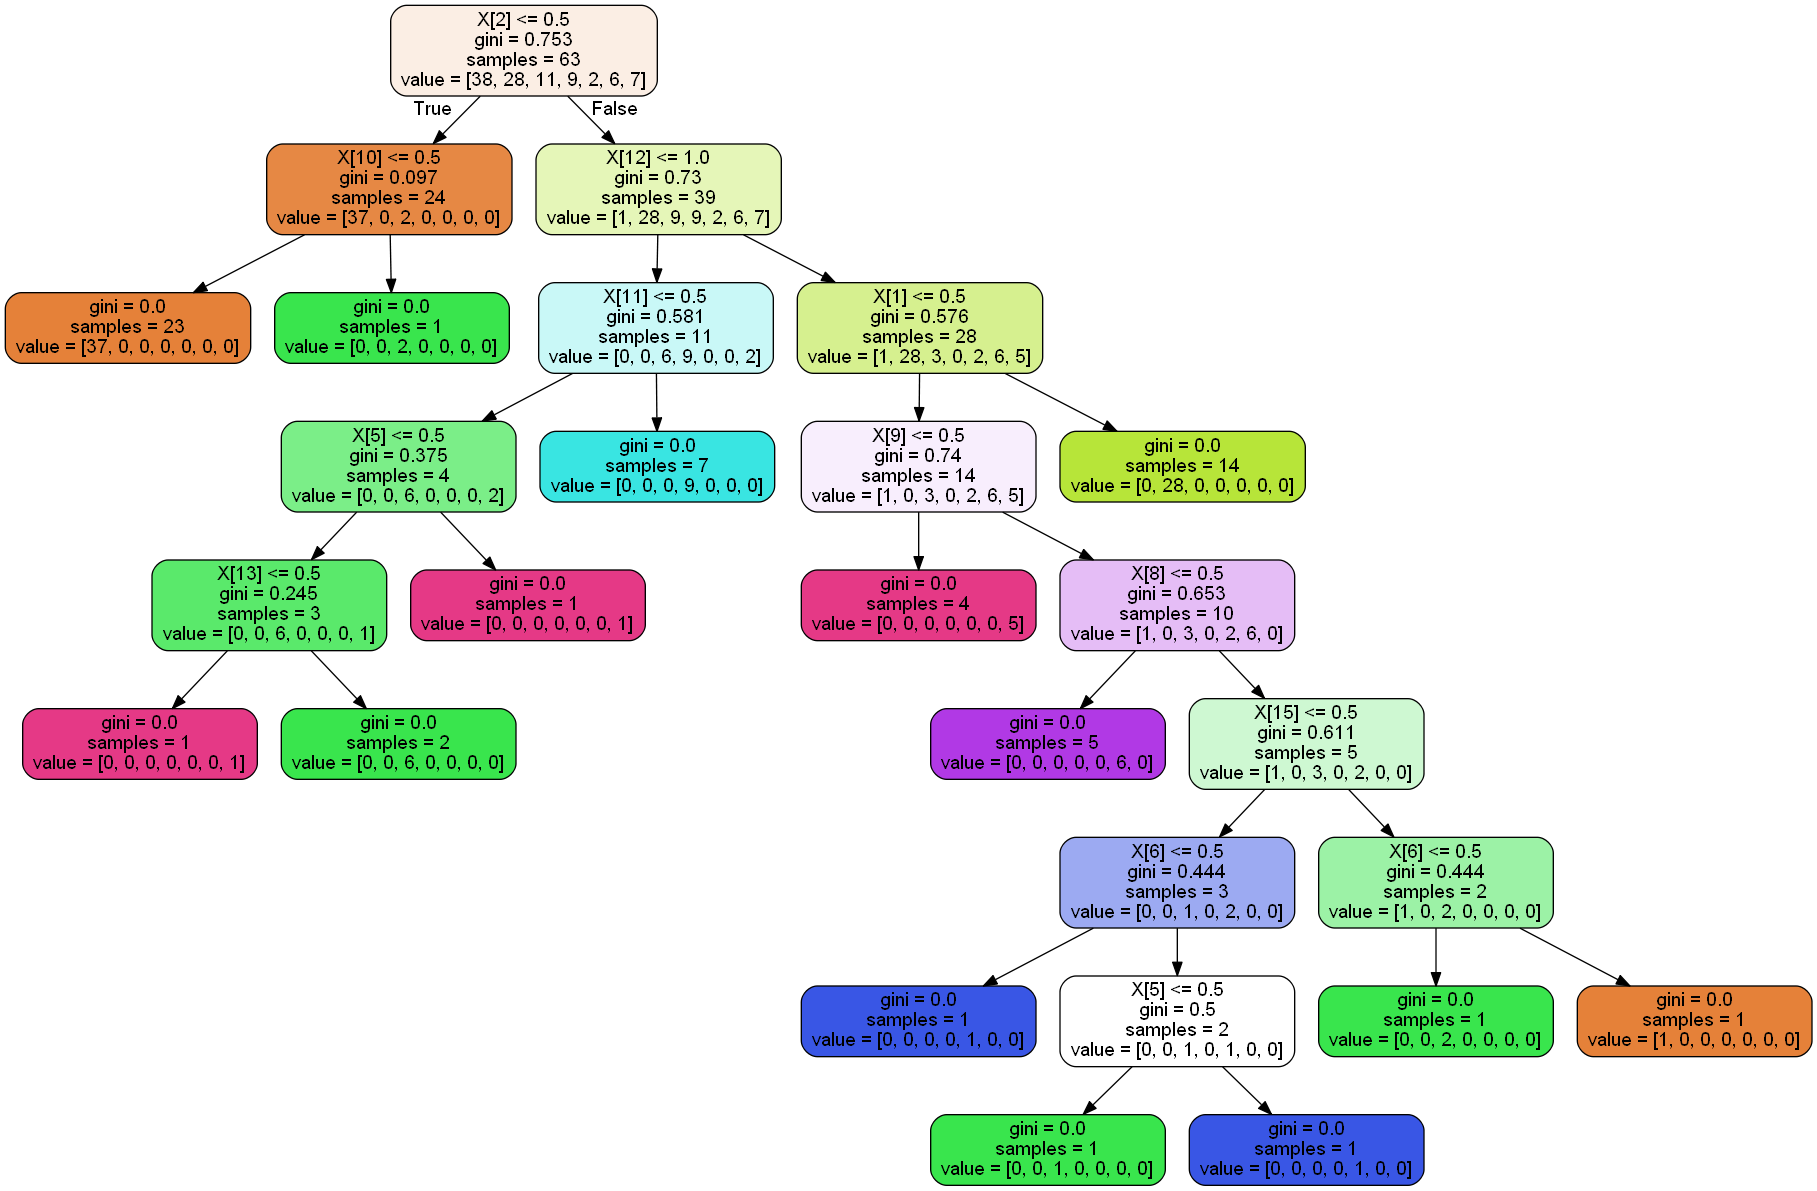

In [180]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from  pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = StringIO()
export_graphviz(R.estimators_[1],out_file=dot_data,
                filled = True,rounded = True,)
graph = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#graph.write_pdf('1sttree.pdf')